In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/hp/PICT/DL/mnist_train/mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,...,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train = df.iloc[0:,1:]
# X_train.shape
print(X_train)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x20  28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28
0        0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
1        0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
2        0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
3        0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
4        0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
59995    0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
59996    0    0    0    0    0    0    0    0   

In [20]:
Y_train = df.iloc[0:,0:1]
print(Y_train)

       label
0          5
1          0
2          4
3          1
4          9
...      ...
59995      8
59996      3
59997      5
59998      6
59999      8

[60000 rows x 1 columns]


In [15]:
df2 = pd.read_csv("C:/Users/hp/PICT/DL/mnist_test/mnist_test.csv")
df2

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,...,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,207,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
X_test = df2.iloc[0:,1:]
Y_test = df2.iloc[0:,0:1]
print(X_test)
print(Y_test)

      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x20  28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28
0       0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
1       0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
2       0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
3       0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
4       0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
9995    0    0    0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0      0
9996    0    0    0    0    0    0    0    0    0  ...  

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [25]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation='sigmoid'))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [30]:
sgd = SGD(0.01)
epochs=10
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics="accuracy")
H = model.fit(X_train,Y_train,epochs=epochs,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.9737 - accuracy: 0.7715 - val_loss: 0.9188 - val_accuracy: 0.7860
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8961 - accuracy: 0.7869 - val_loss: 0.8479 - val_accuracy: 0.7996
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8315 - accuracy: 0.7987 - val_loss: 0.7881 - val_accuracy: 0.8097
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7769 - accuracy: 0.8103 - val_loss: 0.7373 - val_accuracy: 0.8224
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7301 - accuracy: 0.8194 - val_loss: 0.6939 - val_accuracy: 0.8275
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6897 - accuracy: 0.8275 - val_loss: 0.6566 - val_accuracy: 0.8365
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6546 - accuracy: 0.8356 - val_loss: 0.6231 - val_accuracy: 0.8401
Epoch 

In [31]:
H.history

{'loss': [0.9737365245819092,
  0.8960835337638855,
  0.8314696550369263,
  0.7768843173980713,
  0.7300965785980225,
  0.6896964907646179,
  0.6545682549476624,
  0.623772919178009,
  0.5965821146965027,
  0.5726757049560547],
 'accuracy': [0.7715333104133606,
  0.7869499921798706,
  0.7986500263214111,
  0.8102666735649109,
  0.8194000124931335,
  0.8275499939918518,
  0.8355666399002075,
  0.8410999774932861,
  0.8478333353996277,
  0.8525333404541016],
 'val_loss': [0.9187870025634766,
  0.8479135036468506,
  0.7880895733833313,
  0.737321138381958,
  0.6939278244972229,
  0.6566264033317566,
  0.6231091618537903,
  0.5945455431938171,
  0.5694029331207275,
  0.5464330315589905],
 'val_accuracy': [0.7860000133514404,
  0.7996000051498413,
  0.8097000122070312,
  0.8223999738693237,
  0.8274999856948853,
  0.8364999890327454,
  0.8400999903678894,
  0.8483999967575073,
  0.8531000018119812,
  0.8589000105857849]}

In [32]:
predictions = model.predict(X_test,batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1)))

79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.91      0.98      0.95      1135
           2       0.87      0.84      0.85      1032
           3       0.81      0.85      0.83      1010
           4       0.81      0.84      0.82       982
           5       0.82      0.71      0.76       892
           6       0.89      0.91      0.90       958
           7       0.89      0.89      0.89      1028
           8       0.84      0.78      0.81       974
           9       0.80      0.79      0.80      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



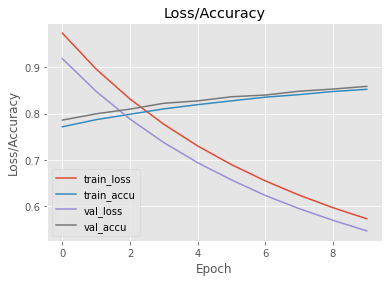

In [35]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="train_accu")
plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_accu")
plt.title("Loss/Accuracy")
plt.xlabel("Epoch")
plt.ylabel('Loss/Accuracy')
plt.legend()